In [1]:
import json
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

eval_result_data_path_mf = "/home/ntao/project/data/result/model_01_MF"
eval_result_data_path_mlp = "/home/ntao/project/data/result/model_02_MLP"
eval_result_data_path_ncf = "/home/ntao/project/data/result/model_03_NCP"

eval_result = json.load(open(eval_result_data_path_mf,'r'))
eval_result.update(json.load(open(eval_result_data_path_mlp,'r')))
eval_result.update(json.load(open(eval_result_data_path_ncf,'r')))
    


In [2]:
index = list(list(eval_result.values())[0].keys())[:-1]
columns = list(eval_result.keys())
eval_df = pd.DataFrame(index=index,columns=columns)
eval_df_raw_list = []

In [3]:
for model_name, eval_metrics in eval_result.items():
    for metric_name, metric_value in eval_metrics.items():
        if 'valid' in metric_name:
            eval_df.loc[metric_name, model_name] = metric_value[0]
        elif metric_name in ['test_rmse','test_mae']:
            eval_df.loc[metric_name, model_name] = metric_value
        elif metric_name in ['valid_rmse','valid_mae']:
            eval_df.loc[metric_name, model_name] = np.mean(metric_value)
        elif 'test_top' in metric_name and 'raw' not in metric_name:
            eval_df.loc[metric_name, model_name] = metric_value[0]
        elif 'test_top' in metric_name and ('_10_' in metric_name or '_50_' in metric_name or '_100_' in metric_name):
            tmp_df = pd.read_json(metric_value)
            tmp_df.columns= [metric_name+'_'+col+'_'+model_name for col in tmp_df.columns]
            eval_df_raw_list.append(tmp_df)
        else:
            pass
       


In [4]:
eval_df_raw = pd.concat(eval_df_raw_list)

In [6]:
new_columns = []
for col in eval_df_raw.columns:
    if 'NCP' in col:
        new_columns.append(col.replace('NCP','NCF'))
    else:
        new_columns.append(col)
        

In [8]:
eval_df_raw.columns = new_columns

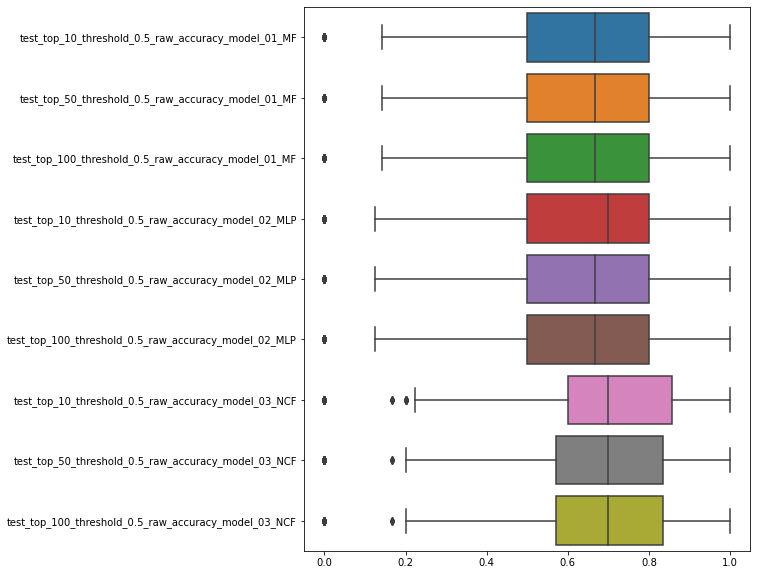

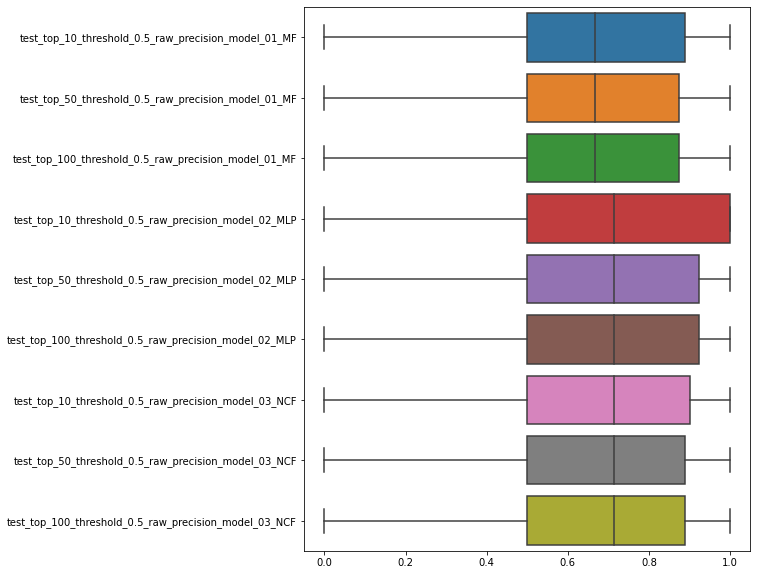

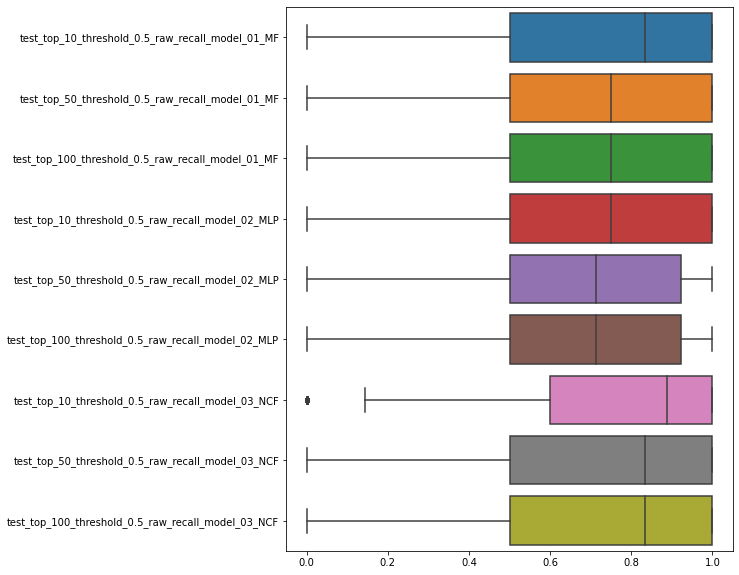

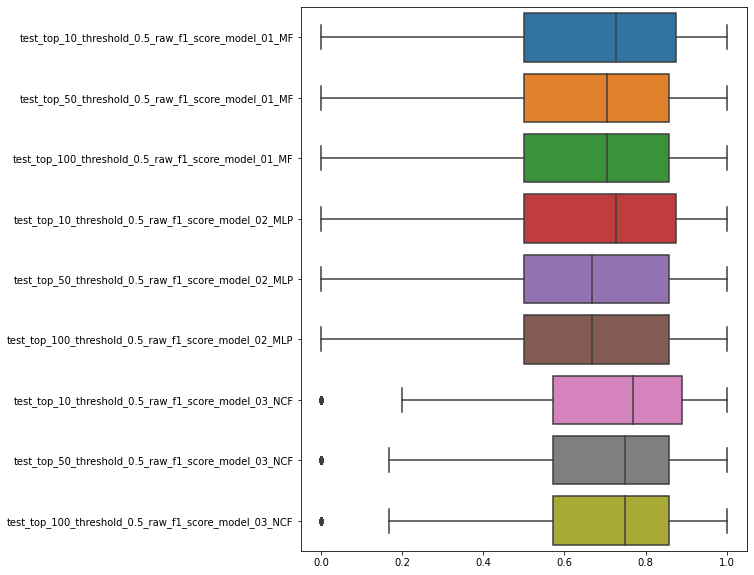

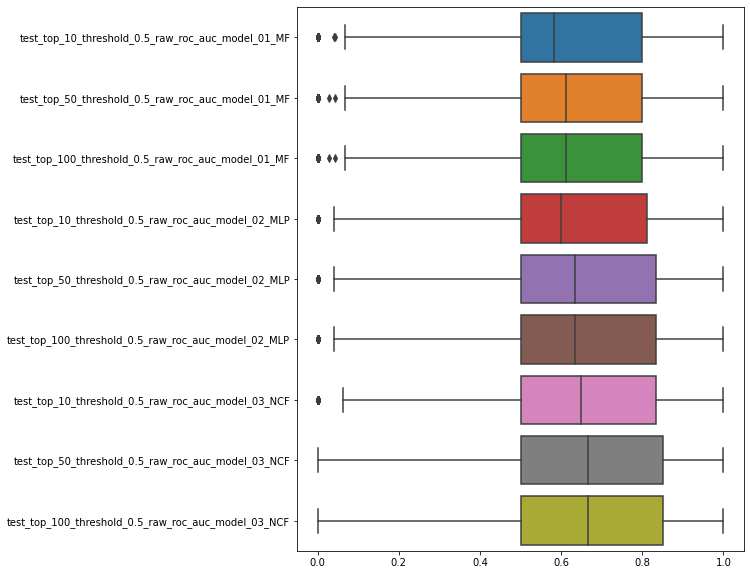

In [9]:
for metric_kind in ['accuracy','precision','recall','f1','roc_auc']:
    sub_cols = [col for col in eval_df_raw.columns if metric_kind in col]
    tmp = eval_df_raw[sub_cols]
    #tmp.T.boxplot(vert=False,figsize=(5,5))
    plt.figure(figsize=(8,10))
    sns.boxplot(data=tmp,orient='h')

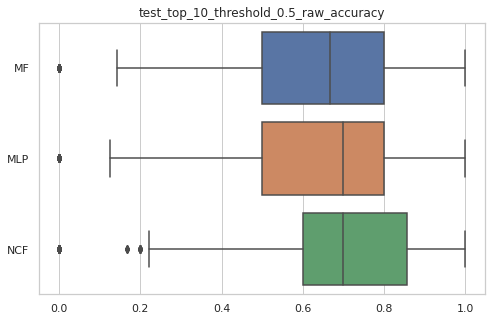

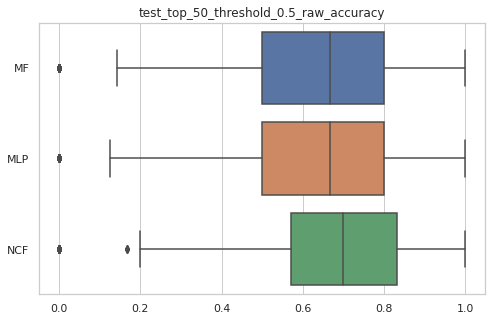

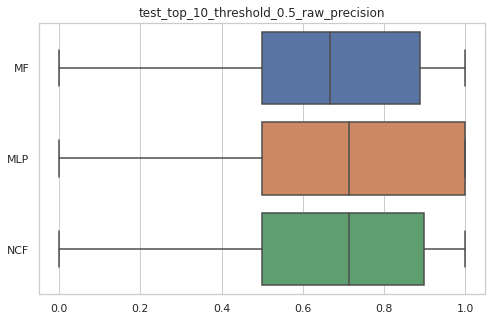

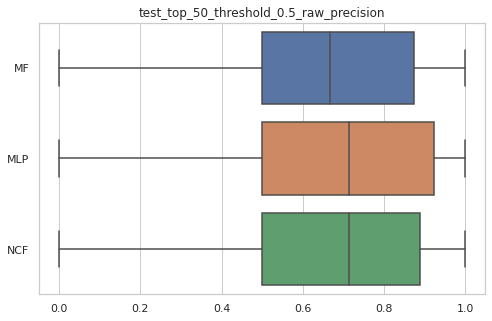

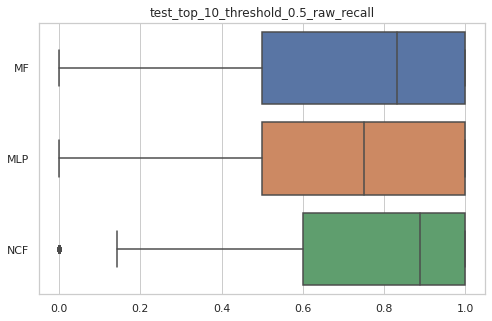

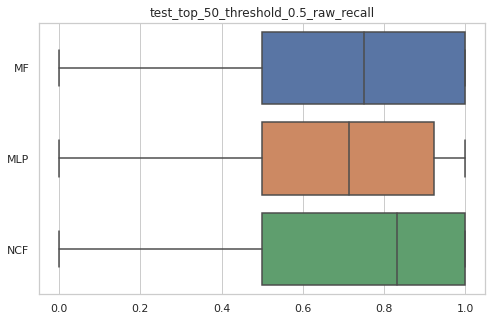

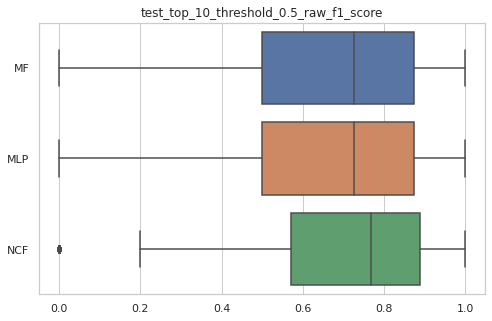

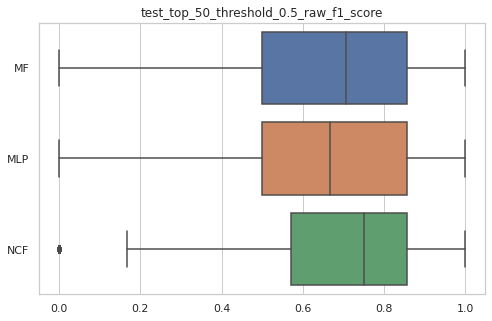

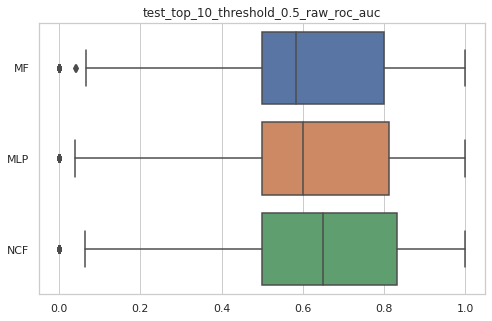

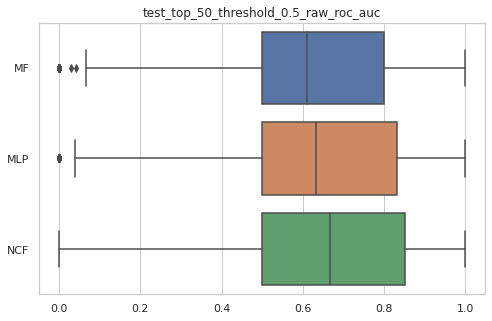

In [31]:
for metric_kind in ['accuracy','precision','recall','f1','roc_auc']:
    sub_cols = [col for col in eval_df_raw.columns if metric_kind in col]
    sub_cols = sorted(sub_cols)
    for k in [10,50]:
        sub_cols_k = [col for col in sub_cols if "top_"+str(k)+"_" in col]
        
        tmp = eval_df_raw[sub_cols_k]
        title = str(tmp.columns[0])[:-12]
        tmp.columns =['MF','MLP','NCF']
        #tmp.T.boxplot(vert=False,figsize=(5,5))
        plt.figure(figsize=(8,5))
        sns.boxplot(data=tmp,orient='h')
        plt.title(title)
    

In [11]:
eval_df = eval_df.dropna().transpose().reset_index().rename(columns={'index':'model'})

In [12]:
eval_df = eval_df.sort_values('model')

In [35]:
eval_df.iloc[0].model  = 'MF'
eval_df.iloc[1].model  = 'MLP'

In [36]:
eval_df.iloc[2].model  = 'NCF'

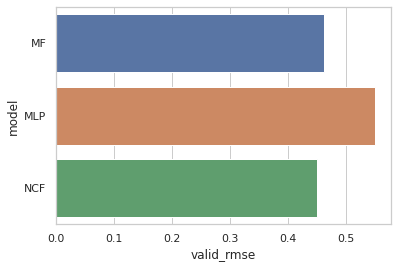

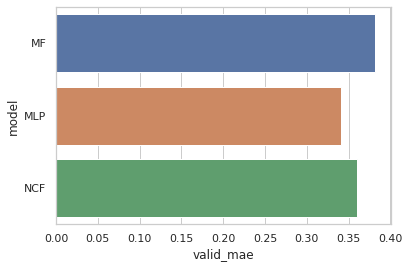

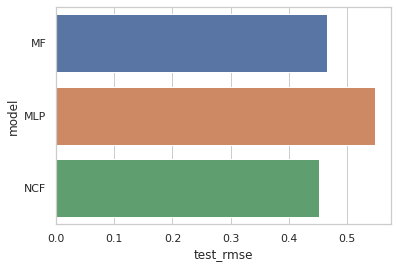

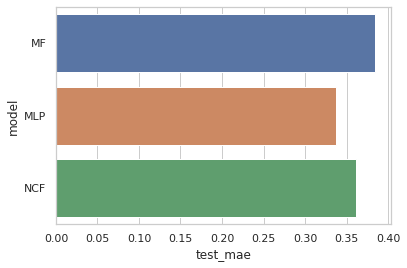

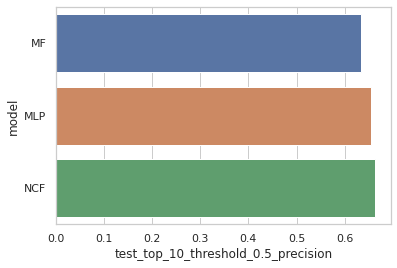

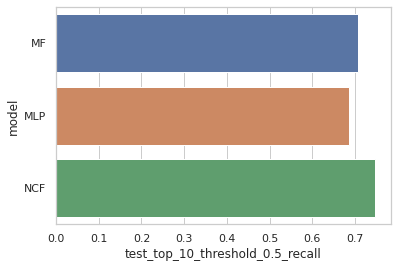

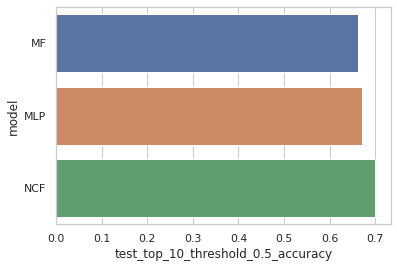

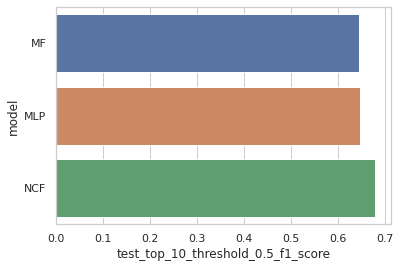

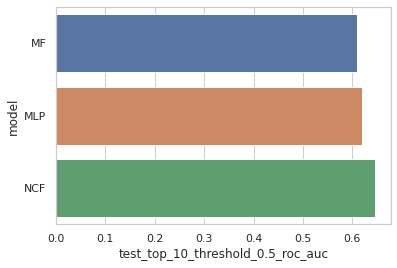

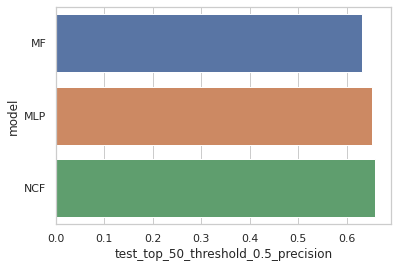

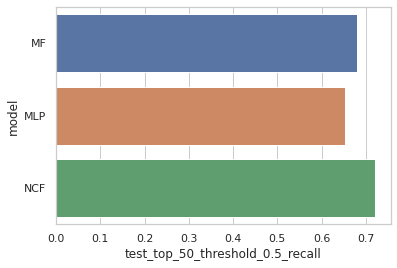

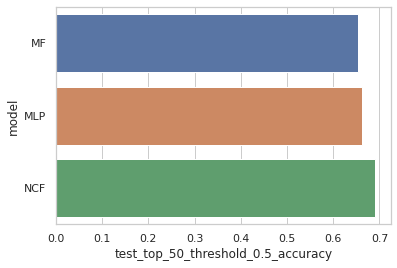

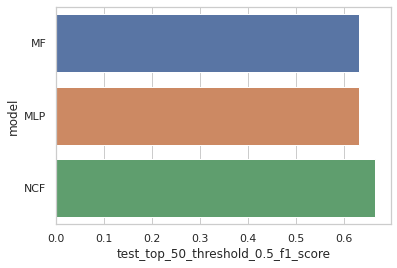

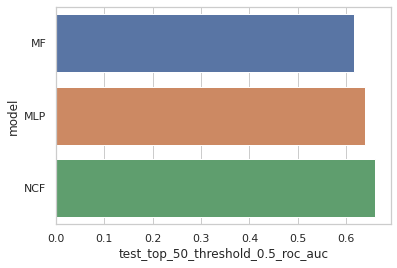

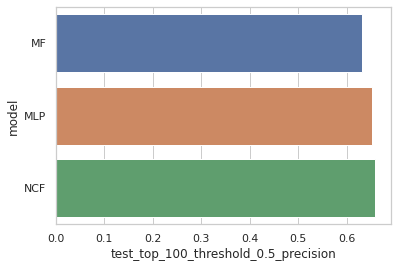

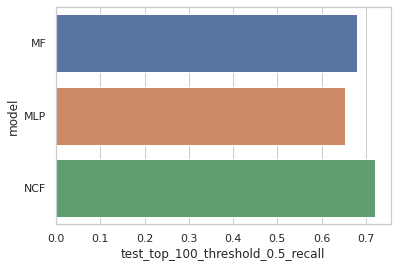

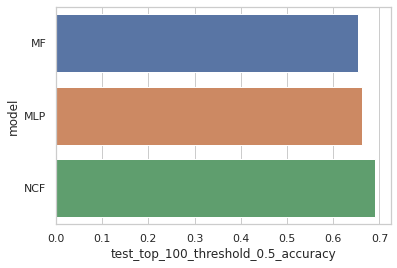

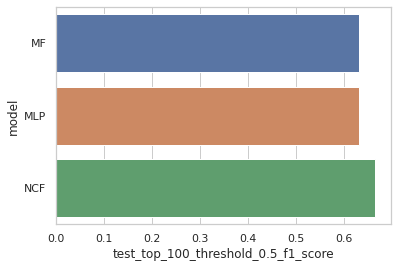

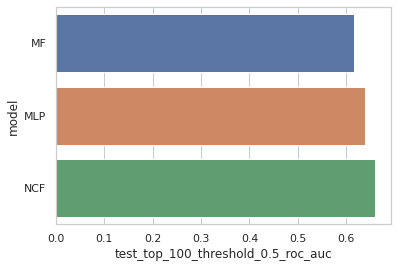

In [37]:
import seaborn as sns
sns.set_theme(style="whitegrid")
for col in eval_df.columns[1:]:
    ax = sns.barplot(y="model", x=col, data=eval_df)
    plt.show()